# Faculty Diversity in Race and Ethnicity

In [1]:
%%capture

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib

matplotlib.rcParams.update({'font.size': 14})
plt.tight_layout()

In [2]:
xls = pd.ExcelFile('../data/race-ethnicity.xlsx')

dfs = dict(pd.read_excel(xls, sheet_name=None))

In [3]:
allDivisions = [ 'HUM', 'NAT', 'SOC' ]
divisions = {
    'HUM': 'Humanities',
    'NAT': 'Natural Sciences',
    'SOC': 'Social Sciences',
}

allStatuses = [ 'NE', 'EL', 'TE' ]
statuses = {
    'NE': 'not eligible for tenure',
    'EL': 'not tenured, but eligible for tenure',
    'TE': 'tenured',
}

# reths = races and ethnicities
reths = [ 'Black/African American', 'Hispanic/Latino', 'Asian American', 'Total' ]

# Graphing Percentages

In [4]:
def lineGraph(ax, div, status, abbrev=False, showPercents=False):
    if isinstance(div, int) and isinstance(status, int):
        div = allDivisions[div]
        status = allStatuses[status]
        
    df = dfs['{}-{}'.format(div, status)]
    for reth in reths:
        yCol = '% ' + reth if showPercents else reth
        ax.plot(df['Year'], df[yCol])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    
    ax.grid()
    ax.legend()
    
    if showPercents:
        ax.axis(ymax=0.2)
        ax.set_yticklabels(['{:.0%}'.format(y) for y in ax.get_yticks()])
    
    name = '{}, {}'.format(
        divisions[div],
        status if abbrev else statuses[status]
    )
    ylabel = ('%' if showPercents else 'Number of') + ' Race/Ethnicity'
    ax.set(xlabel='Year', ylabel=ylabel, title=name)

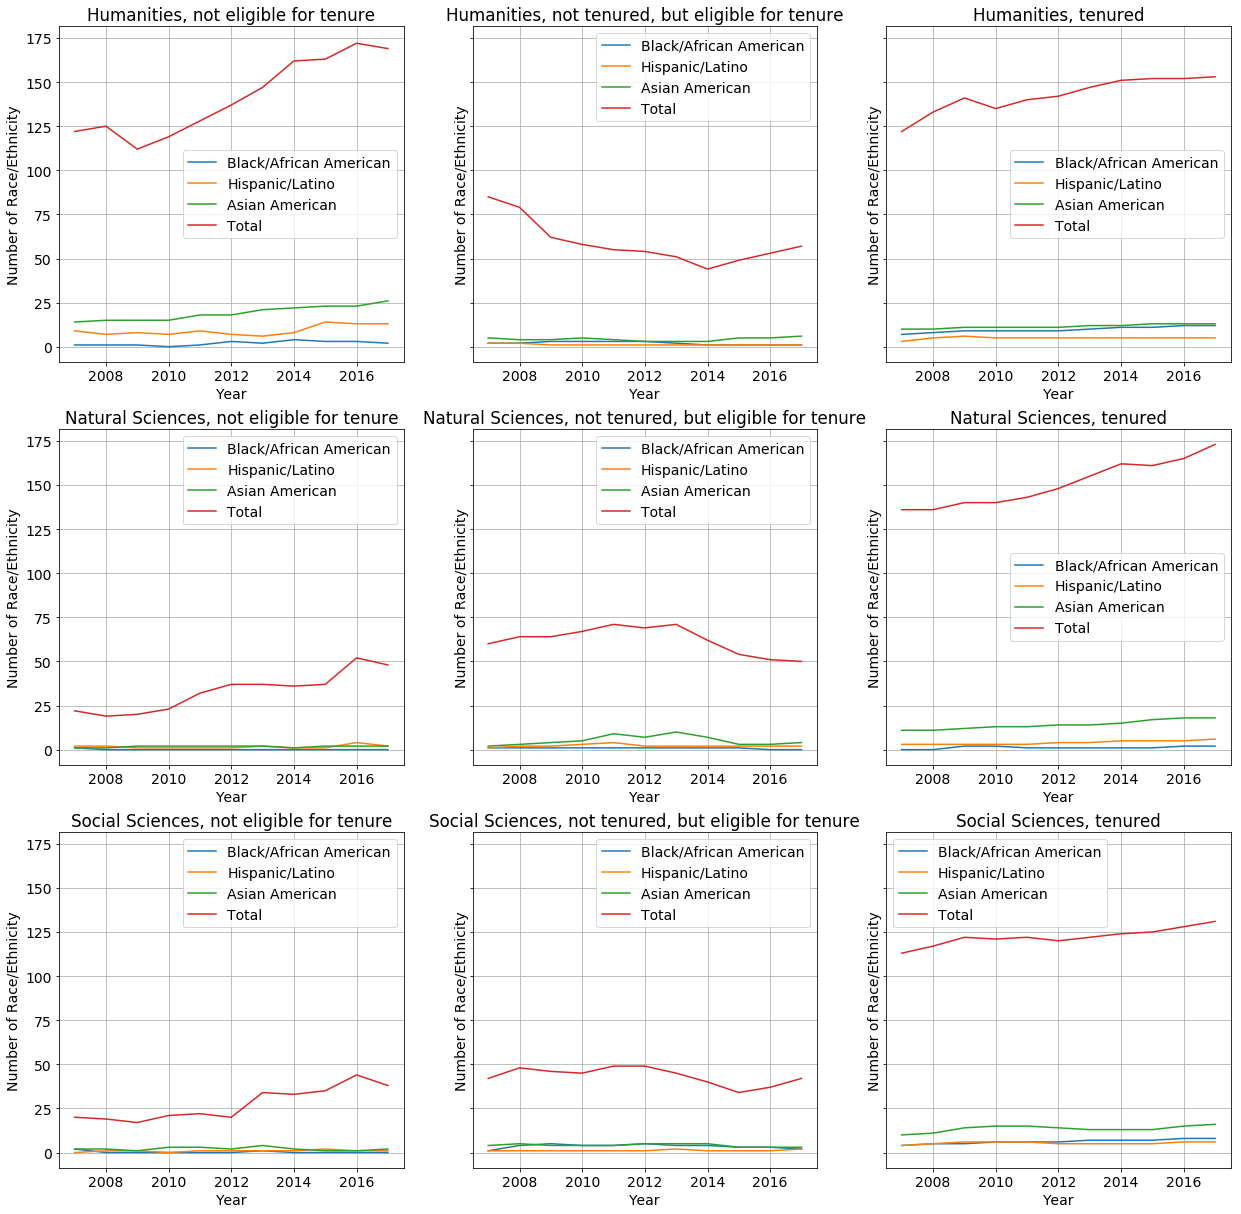

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(21, 21), sharey=True)

for i in range(9):
    lineGraph(ax[i//3, i%3], i // 3, i % 3)